# DATA SCIENCE COMISION #61750 - CODERHOUSE

##1. Introducción de Dataset - Resumen Metadata

### Descripción del Problema

###**Objetivo**

El objetivo principal de este proyecto es desarrollar un modelo de clasificación capaz de predecir el género de una canción en función de sus características. Para alcanzar este objetivo, se analizará un conjunto de datos relacionados con canciones, se llevará a cabo un análisis exploratorio de los datos para entender mejor las características y patrones presentes, y se construirá y evaluará el rendimiento de varios modelos de clasificación.

###**Fuente**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download&select=train.csv

###Importación de librerías y carga de datos

In [115]:
#Importación de librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_squared_error, confusion_matrix


In [116]:
#Carga de Datasets:
url_train = "https://raw.githubusercontent.com/guillefranzonig/Data-Science-I/refs/heads/main/train.csv"
url_test = "https://raw.githubusercontent.com/guillefranzonig/Data-Science-I/refs/heads/main/test.csv"
url_submission = "https://raw.githubusercontent.com/guillefranzonig/Data-Science-I/refs/heads/main/submission.csv"

train_df = pd.read_csv(url_train)
test_df = pd.read_csv(url_test)
submission_df = pd.read_csv(url_submission)

### Número de filas/columnas

In [117]:
train_df.shape

(17996, 17)

In [118]:
test_df.shape

(7713, 16)

In [119]:
submission_df.shape

(7713, 11)

### Tipo de Datos

In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

**1. Cantidad de Registros:**
- El data set contiene 17.996 registros.

**2. Tipos de datos:**
- 12 columnas de tipo float64
- 3 columnas de tipo int64
- 2 columnas de tipo object

**3. Valores nulos:**
- Las columnas "Popularity", "key" e "instrumentalness" contienen valores nulos.

In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

**1. Cantidad de Registros:**
- El data set contiene 7.713 registros.

**2. Tipos de datos:**
- 12 columnas de tipo float64
- 2 columnas de tipo int64
- 2 columnas de tipo object

**3. Valores nulos:**
- Las columnas "Popularity", "key" e "instrumentalness" contienen valores nulos.

In [122]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


**1. Cantidad de Registros:**
- El data set contiene 7.713 registros.

**2. Tipos de datos:**
- 11 columnas de tipo float64

Este dataset sirve simplemente como auxiliar ya que contiene el nombre de cada género de música.

### Cuenta de valores Nulos

In [123]:
# Contar los valores nulos por columna
null_counts_train = train_df.isnull().sum()
print(null_counts_train)

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [124]:
null_counts_test = test_df.isnull().sum()
print(null_counts_test)

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64


Se puede observar una cantidad significativa de valores nulos en ambos dataframes. Estos serán tratados posteriormente para evitar distorsiones en el modelo.

In [125]:
train_df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

In [126]:
test_df.describe()

Popularity  danceability       energy          key     loudness  \
count  7486.000000   7713.000000  7713.000000  6905.000000  7713.000000   
mean     44.968074      0.548110     0.663465     5.924692    -7.840913   
std      17.401707      0.164906     0.234822     3.238735     3.982363   
min       1.000000      0.000000     0.000020     1.000000   -36.544000   
25%      33.000000      0.440000     0.510000     3.000000    -9.527000   
50%      44.000000      0.549000     0.699000     6.000000    -6.917000   
75%      57.000000      0.661000     0.863000     9.000000    -5.184000   
max     100.000000      0.975000     1.000000    11.000000     0.878000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  7713.000000  7713.000000   7713.000000       5804.000000  7713.000000   
mean      0.646311     0.080052      0.241400          0.170052     0.198331   
std       0.478145     0.084228      0.308006          0.298011     0.161399   
min       0.000000     0.000000      0.000000          0.000001     0.016900   
25%       0.000000     0.034800      0.004600          0.000092     0.098500   
50%       1.000000     0.047000      0.075600          0.004010     0.131000   
75%       1.000000     0.083300      0.406000          0.165250     0.260000   
max       1.000000     0.960000      0.995000          0.987000     0.992000   

           valence        tempo  duration_in min/ms  time_signature  
count  7713.000000  7713.000000        7.713000e+03     7713.000000  
mean      0.489787   122.976657        1.994245e+05        3.918060  
std       0.237996    29.723547        1.131100e+05        0.369727  
min       0.000000     0.000000        6.874500e-01        0.000000  
25%       0.306000    99.678000        1.655660e+05        4.000000  
50%       0.484000   121.140000        2.088890e+05        4.000000  
75%       0.672000   141.984000        2.506940e+05        4.000000  
max       0.982000   249.438000        1.561133e+06        5.000000

### Primeros Registros

In [127]:
train_df.head(3)

Artist Name                             Track Name  Popularity  \
0     Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1         Boston                           Hitch a Ride        54.0   
2  The Raincoats                     No Side to Fall In        35.0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564  1.0    -4.964     1       0.0485        0.0171   
1         0.382   0.814  3.0    -7.230     1       0.0406        0.0011   
2         0.434   0.614  6.0    -8.334     1       0.0525        0.4860   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849    0.899  134.071            234596.0   
1          0.004010    0.1010    0.569  116.454            251733.0   
2          0.000196    0.3940    0.787  147.681            109667.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6

In [128]:
test_df.head(3)

Artist Name                    Track Name  Popularity  danceability  \
0  David Bowie  Space Oddity - 2015 Remaster        73.0         0.310   
1  Crimson Sun           Essence of Creation        34.0         0.511   
2         P!nk              Raise Your Glass        78.0         0.700   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.403  NaN   -13.664     1       0.0326        0.0726          0.000093   
1   0.955  1.0    -5.059     1       0.1290        0.0004          0.000009   
2   0.709  7.0    -5.006     1       0.0839        0.0048               NaN   

   liveness  valence    tempo  duration_in min/ms  time_signature  
0    0.1390    0.466  134.480            318027.0               4  
1    0.2630    0.291  151.937            220413.0               4  
2    0.0289    0.625  122.019            202960.0               4

Mapeo de género

In [129]:
# Obtener los nombres de las columnas como una lista
column_names = list(submission_df.columns)

# Crear un diccionario de mapeo usando un bucle for
mapping_dict = {}
for index, name in enumerate(column_names):
    key_part = name.split('_')[0]
    mapping_dict[index] = key_part

# Mapear la columna 'Class' a 'Genre' usando el diccionario de mapeo
train_df['Genre'] = train_df['Class'].apply(lambda x: mapping_dict.get(x))

A partir del dataframe **submission_df**, se extrajeron los nombres de los géneros de música que están asociados a la columna **Class** del dataframe **train_df**, creando una nueva columna llamada **Genre**. Esto permitirá realizar distintas visualizaciones discriminadas por género musical.

## **2. DATA ADQUISITION / DATA WRANGLING**

### Outliers

In [130]:
# Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame train_df utilizando el criterio del rango intercuartílico (IQR) excluyendo variables binarias.

def calcular_outliers_iqr(train_df):
    resultados = []

    for columna in train_df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if train_df[columna].nunique() == 2:
            continue

        q1 = train_df[columna].quantile(0.25)
        q3 = train_df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = train_df[(train_df[columna] < limite_inferior) | (train_df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(train_df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df_train = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df_train = outliers_df_train[outliers_df_train['Porcentaje_Outliers'] > 0]
    outliers_df_train = outliers_df_train.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df_train

Este código generará una tabla con los valores de outliers en porcentaje para train_df. Se excluyen las columnas con variables binarias, ya que, por su propia naturaleza, no pueden presentar outliers al tener solo dos valores posibles.

In [131]:
calcular_outliers_iqr(train_df)

Columna  Porcentaje_Outliers
0  duration_in min/ms            18.031785
1    instrumentalness            13.380751
2         speechiness            11.302512
3      time_signature             8.585241
4            liveness             5.312292
5            loudness             4.545455
6          Popularity             0.227828
7               tempo             0.200044
8        danceability             0.172261

Se puede observar que las columnas "duration_in min/ms", "instrumentalness" y "speechiness" tienen valores elevados de outliers, por lo que deberemos tratarlos adecuadamente.

In [132]:
# Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame test_df utilizando el criterio del rango intercuartílico (IQR) excluyendo variables binarias.

def calcular_outliers_test_iqr(test_df):
    resultados = []

    for columna in test_df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if test_df[columna].nunique() == 2:
            continue

        q1 = test_df[columna].quantile(0.25)
        q3 = test_df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = test_df[(test_df[columna] < limite_inferior) | (test_df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(test_df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df_test = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df_test = outliers_df_test[outliers_df_test['Porcentaje_Outliers'] > 0]
    outliers_df_test = outliers_df_test.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df_test

Este código generará una tabla con los valores de outliers en porcentaje para test_df. Se excluyen las columnas con variables binarias, ya que, por su propia naturaleza, no pueden presentar outliers al tener solo dos valores posibles.

In [133]:
calcular_outliers_test_iqr(test_df)

Columna  Porcentaje_Outliers
0  duration_in min/ms            18.825360
1    instrumentalness            14.170880
2         speechiness            11.694542
3      time_signature             8.647738
4            liveness             5.510178
5            loudness             4.291456
6        danceability             0.505640
7               tempo             0.194477
8          Popularity             0.116686

Se observan valores similares a los de train_df, con pequeñas diferencias que se tratarán más adelante.


In [134]:
def plot_boxplot_outliers(train_df, columnas_outliers_train):
    # Normalizar las columnas con outliers en el conjunto de entrenamiento
    scaler = MinMaxScaler()
    train_df_normalized = train_df.copy()
    train_df_normalized[columnas_outliers_train] = scaler.fit_transform(train_df[columnas_outliers_train])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers_train) * 2, 10))
    sns.boxplot(data=train_df_normalized[columnas_outliers_train], orient='v', palette="pastel")

    # Ajustes finales del gráfico
    plt.title('Boxplot con Outliers Normalizados (Conjunto de Entrenamiento)', fontsize=16)
    plt.ylabel('Valor Normalizado', fontsize=10)
    plt.xticks(fontsize=12)



In [135]:
def normalize_outliers(test_df, columnas_outliers_test):
    scaler = MinMaxScaler()
    test_df_normalized = test_df.copy()
    test_df_normalized[columnas_outliers_test] = scaler.fit_transform(test_df[columnas_outliers_test])
    return test_df_normalized

Este código normaliza los outliers de los dataframes (train_df y test_df) utilizando el método "MinMaxScaler" para minimizar su impacto. Además, se incluye un boxplot que muestra los resultados después del tratamiento de outliers en el dataframe train_df.


In [136]:
outliers_df_train = calcular_outliers_iqr(train_df)

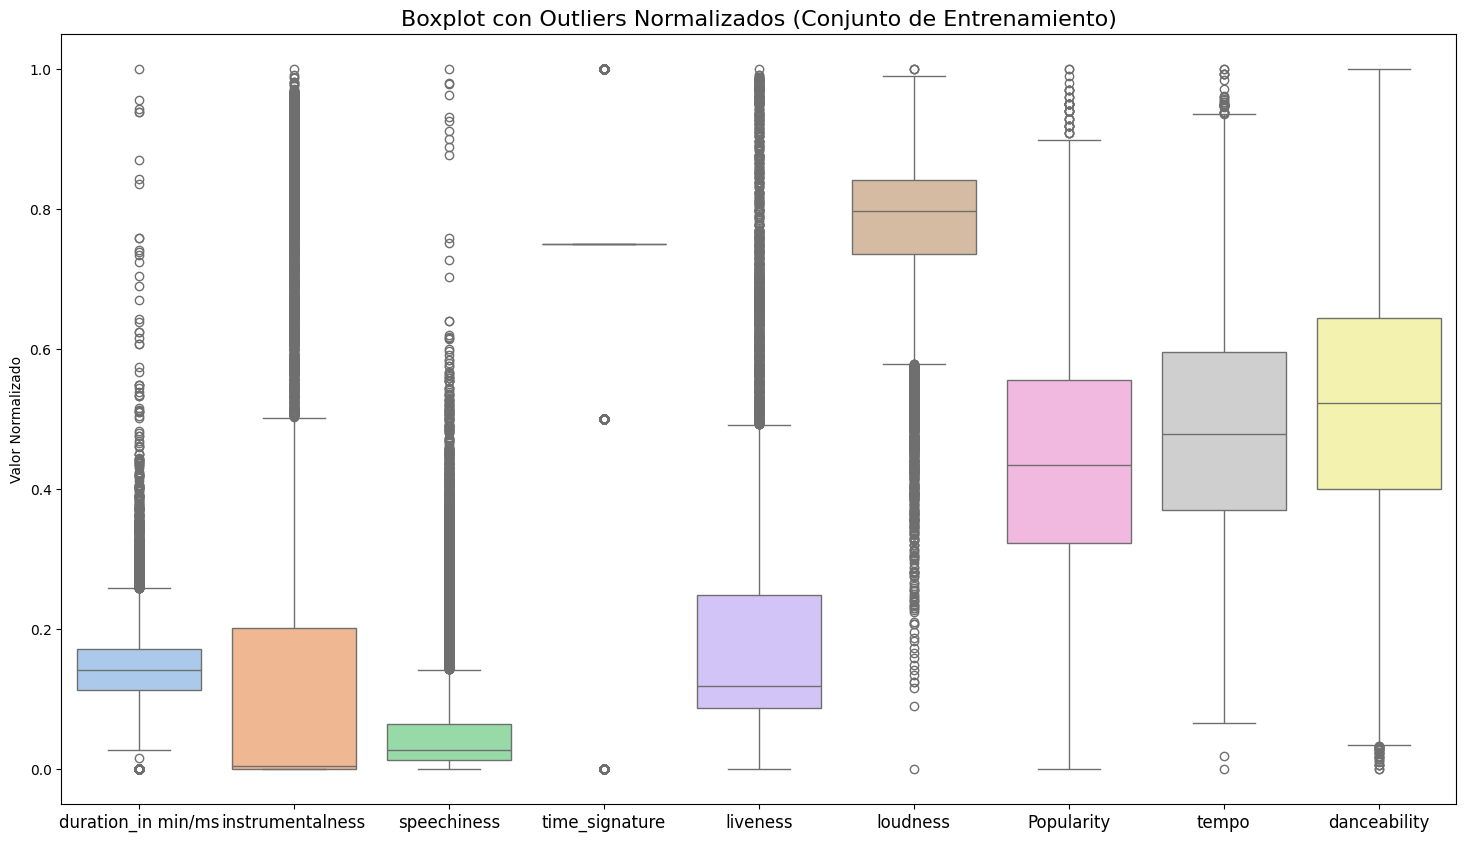

In [137]:
columnas_outliers_train = outliers_df_train['Columna'].tolist()
plot_boxplot_outliers(train_df ,columnas_outliers_train)

### Tratamiento de Valores nulos

In [138]:
def imputar_valores_nulos(data):

  # Imputar columna KEY con la moda
    moda_key = data['key'].mode()[0]
    data['key'] = data['key'].fillna(moda_key)

    # Imputar columna POPULRITY con la mediana
    mediana_popularity = data['Popularity'].median()
    data['Popularity'] = data['Popularity'].fillna(mediana_popularity)

    # Imputar columna INSTRUMENTALNESS con la media
    media_instrumentalness = data['instrumentalness'].mean()
    data['instrumentalness'] = data['instrumentalness'].fillna(media_instrumentalness)

    return data

    # Aplicar la función de imputación
train_df = imputar_valores_nulos(train_df)

# Contar los valores nulos por columna nuevamente
null_counts_train = train_df.isnull().sum()
print(null_counts_train)

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Genre                 0
dtype: int64


In [140]:
def imputar_valores_nulos_df_test(data):

  # Imputar columna KEY con la moda
    moda_key = data['key'].mode()[0]
    data['key'] = data['key'].fillna(moda_key)

    # Imputar columna POPULRITY con la mediana
    mediana_popularity = data['Popularity'].median()
    data['Popularity'] = data['Popularity'].fillna(mediana_popularity)

    # Imputar columna INSTRUMENTALNESS con la media
    media_instrumentalness = data['instrumentalness'].mean()
    data['instrumentalness'] = data['instrumentalness'].fillna(media_instrumentalness)

    return data

    # Aplicar la función de imputación
test_df = imputar_valores_nulos_df_test(test_df)

# Contar los valores nulos por columna nuevamente
null_counts_test = test_df.isnull().sum()
print(null_counts_test)

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


Se aplicaron tratamientos distintos para cada columna con valores nulos, eligiendo la mejor opción posible de acuerdo al tipo de variable y la cantidad de outliers:

- En la columna KEY, aunque contiene valores numéricos, se considera una variable categórica. Por lo tanto, la mejor opción fue completar los valores nulos con la moda.
- La columna POPULARITY, al tener una baja cantidad de outliers (menos del 1%), se decidió completar los valores nulos con la mediana.
- En cuanto a la columna INSTRUMENTALNESS, debido a su alto porcentaje de outliers (más del 10%), se optó por tratar los valores nulos

## **3. ANÁLISIS EXPLORATORIO DE DATOS**

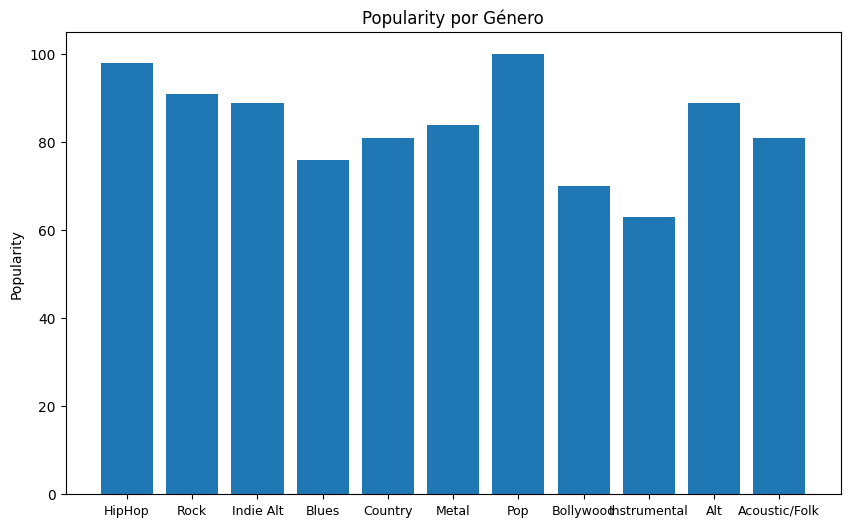

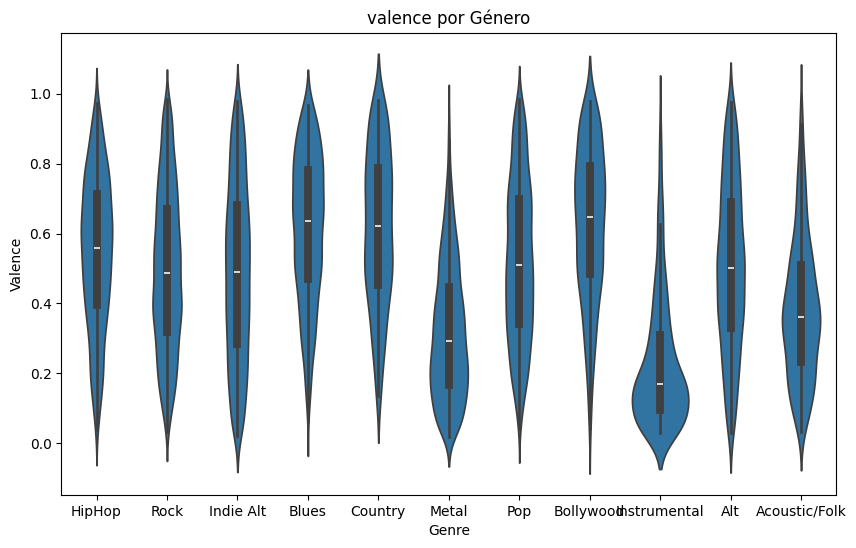

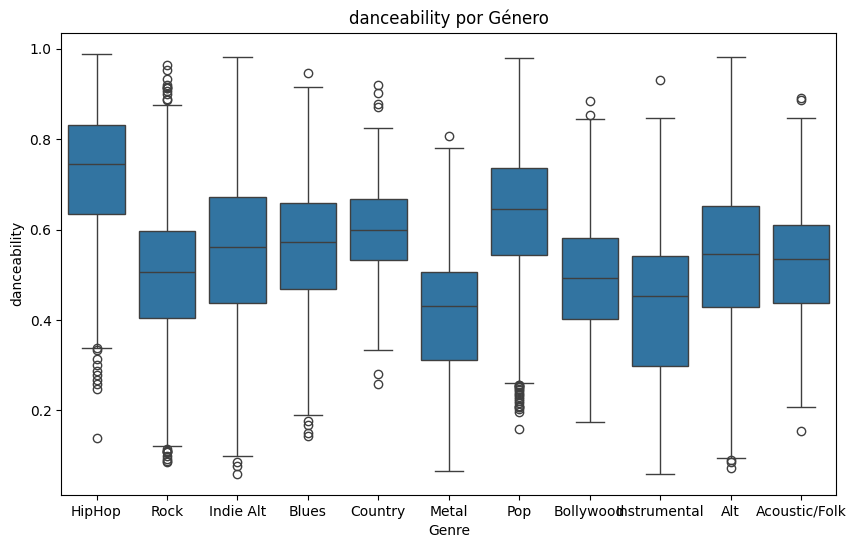

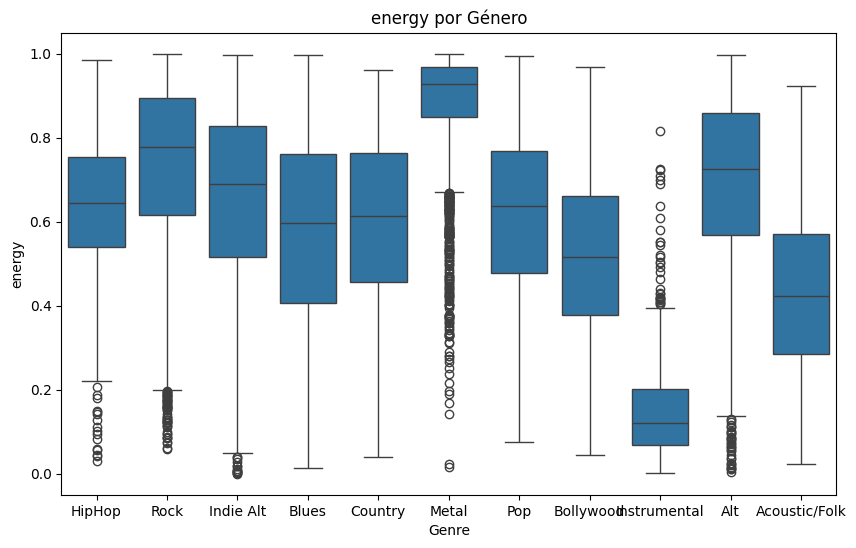

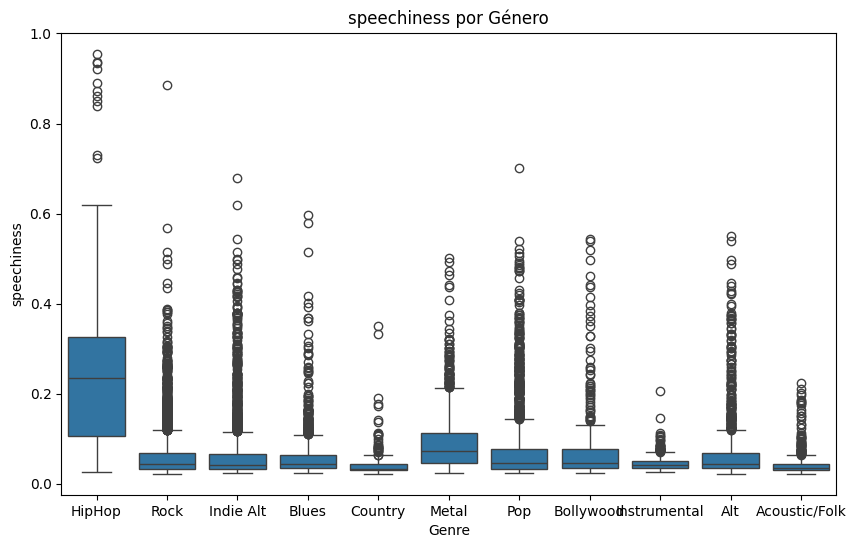

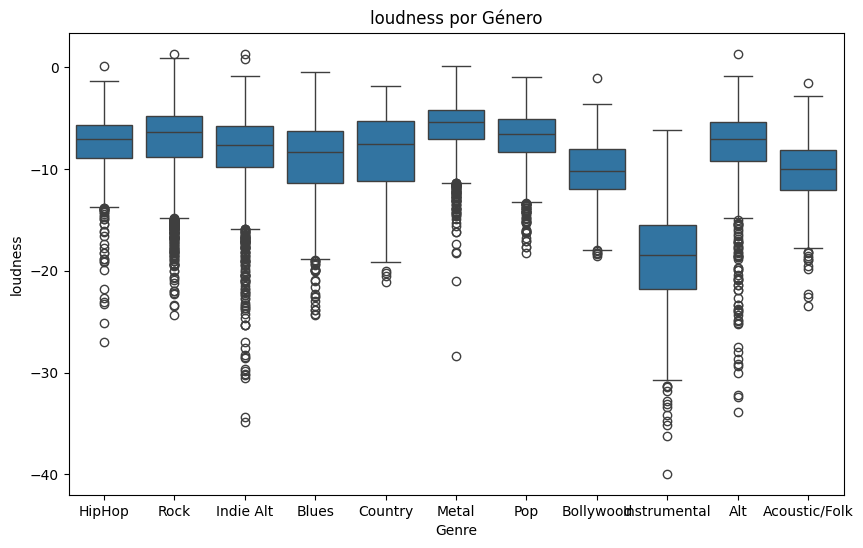

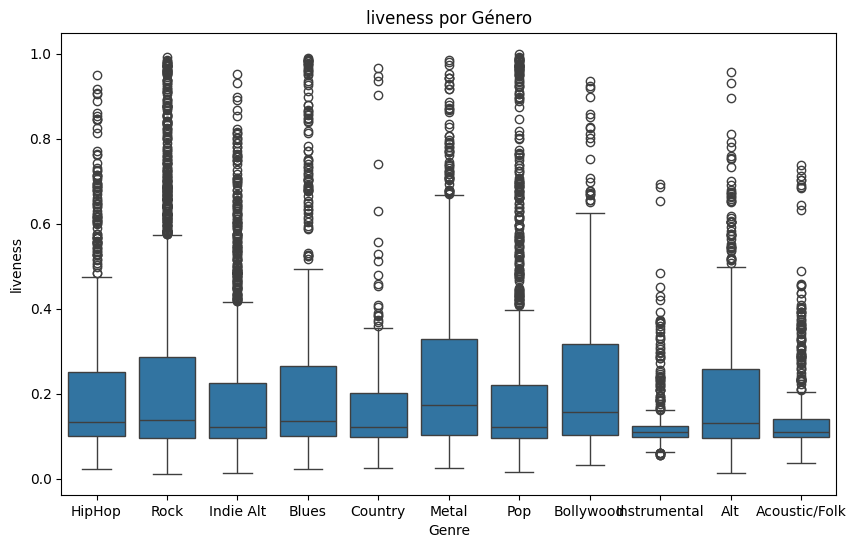

In [155]:
# Gráfico de barras de popularidad por género (matplotlib)
plt.figure(figsize=(10,6))
plt.bar(train_df['Genre'], train_df['Popularity'])
plt.xlabel('')  # Desactivar el nombre del eje x
plt.ylabel('Popularity')
plt.title('Popularity por Género')
plt.xticks(fontsize=9)



# Gráfico de violín de valence por género (seaborn)
plt.figure(figsize=(10,6))
sns.violinplot(x='Genre', y='valence', data=train_df)
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.title('valence por Género')
plt.show()



# Nuevo gráfico: Boxplot de características numéricas por género (seaborn)
numeric_features = ['danceability', 'energy',
                    'speechiness', 'loudness', 'liveness']

for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Genre', y=feature, data=train_df)
    plt.xlabel('Genre')
    plt.ylabel(feature)
    plt.title(f'{feature} por Género')
    plt.show()

Para conocer y profundizar un poco más en el conocimiento del dataset, se hicieron distintos gráficos con MatPlotLib y Seaborn que nos muestran como se comportan las distintas variables en relación al género musical.

## **4. ANÁLISIS ESTADÍSTICO DE DATOS**

### Análisis Univariado

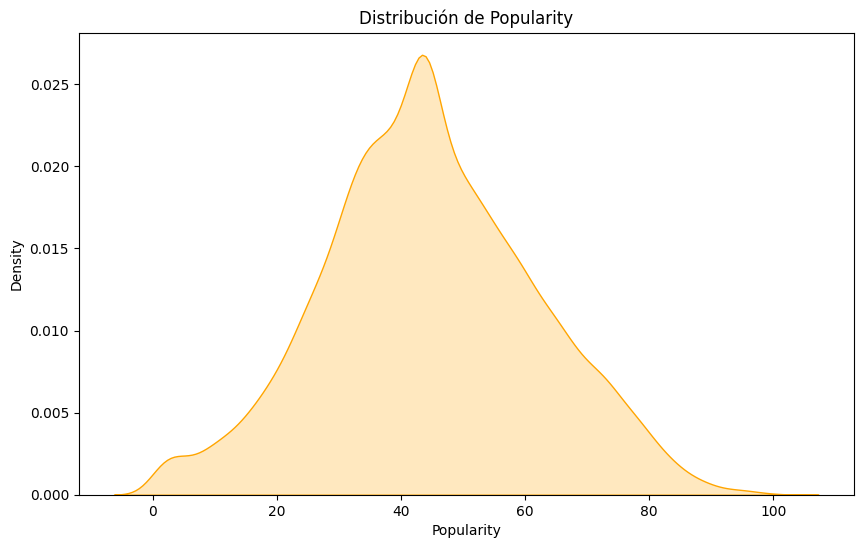

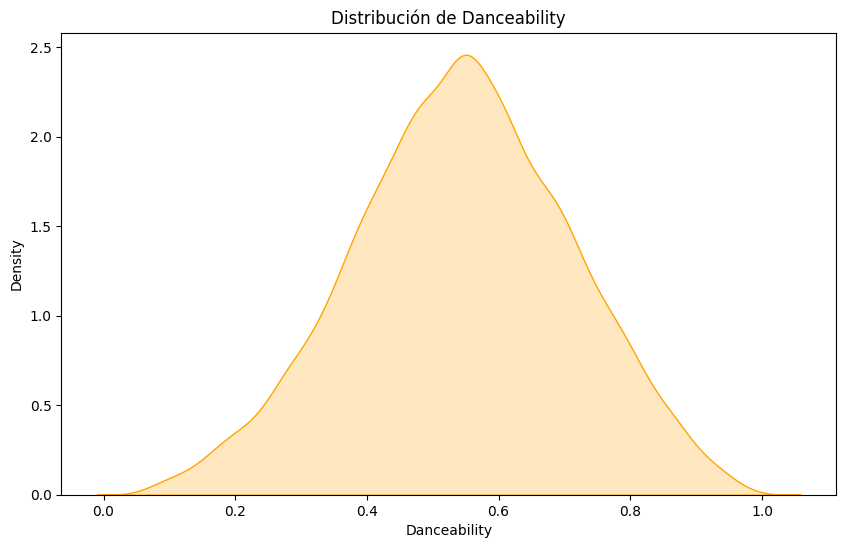

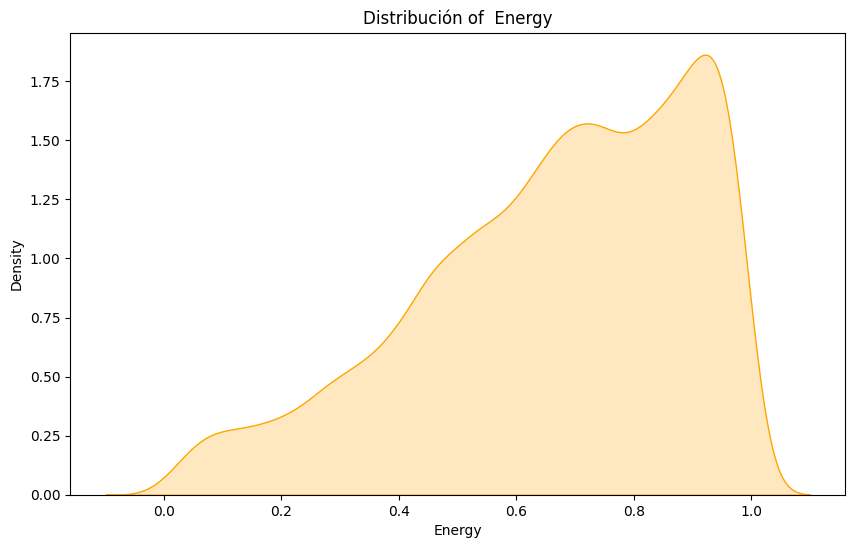

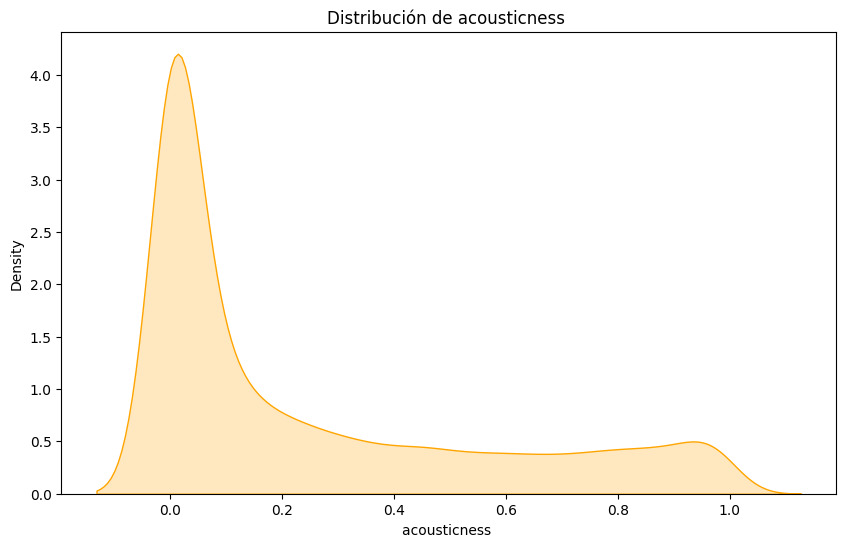

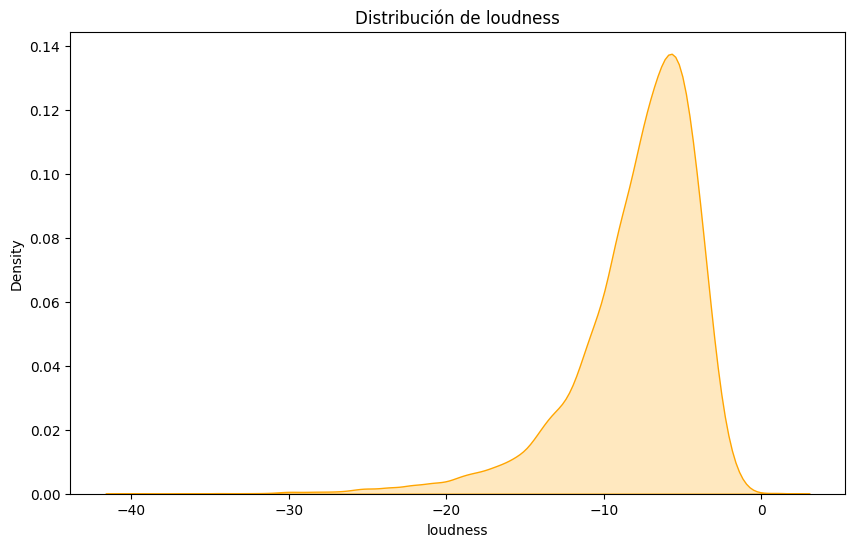

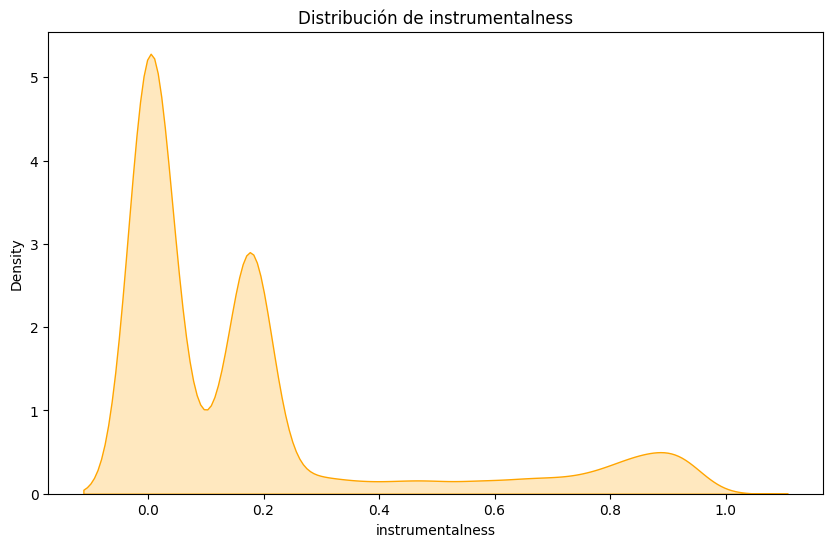

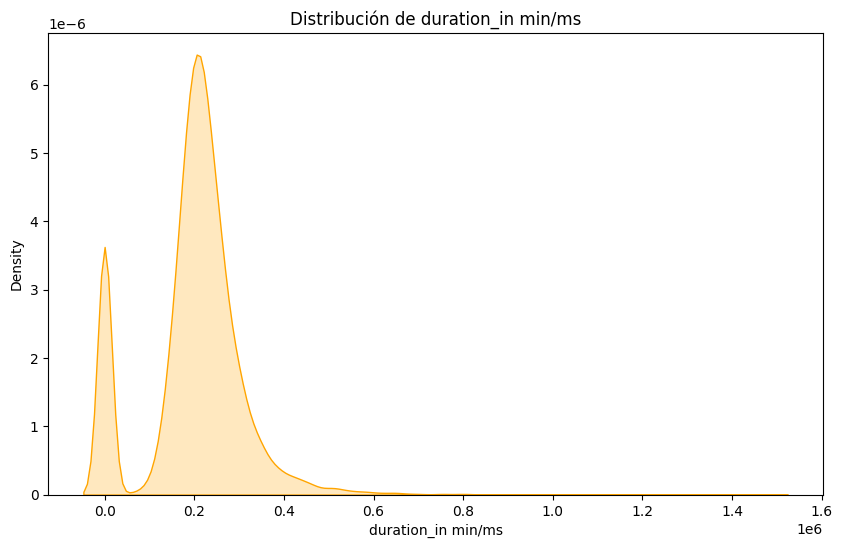

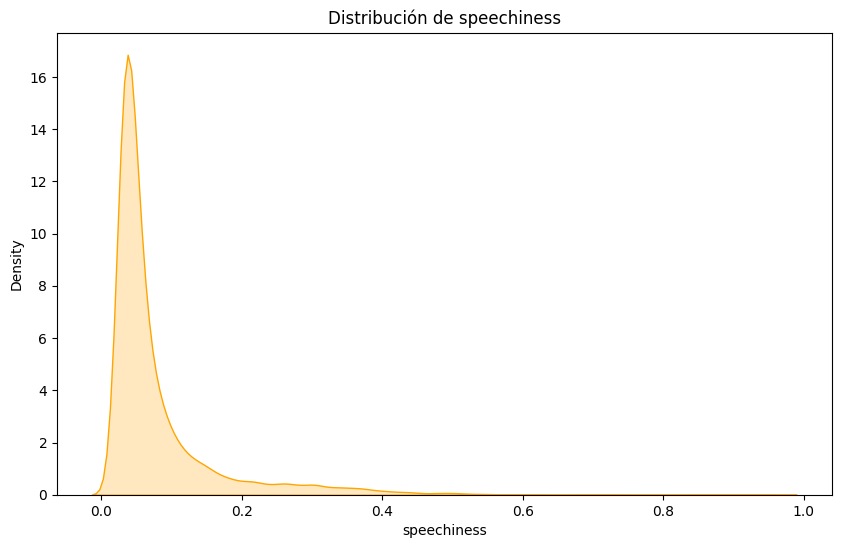

In [158]:
# Distribión de Popularity
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['Popularity'], fill=True, color='orange')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Distribución de Popularity')
plt.show()

# Distribución de la Danceability
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['danceability'], fill=True, color='orange')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Distribución de Danceability')
plt.show()

# Distribución de Energy
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['energy'], fill=True, color='orange')
plt.xlabel('Energy')
plt.ylabel('Density')
plt.title('Distribución of  Energy')
plt.show()

# Distribución de acousticness
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['acousticness'], fill=True, color='orange')
plt.xlabel('acousticness ')
plt.ylabel('Density')
plt.title('Distribución de acousticness ')
plt.show()

# Distribución de Loudness
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['loudness'], fill=True, color='orange')
plt.xlabel('loudness')
plt.ylabel('Density')
plt.title('Distribución de loudness')
plt.show()

# Distribución de la Instrumentalness
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['instrumentalness'], fill=True, color='orange')
plt.xlabel('instrumentalness')
plt.ylabel('Density')
plt.title('Distribución de instrumentalness')
plt.show()

# Distribución de la duration_in min/ms
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['duration_in min/ms'], fill=True, color='orange')
plt.xlabel('duration_in min/ms')
plt.ylabel('Density')
plt.title('Distribución de duration_in min/ms')
plt.show()

# Distribución de la speechiness
plt.figure(figsize=(10,6))
sns.kdeplot(train_df['speechiness'], fill=True, color='orange')
plt.xlabel('speechiness')
plt.ylabel('Density')
plt.title('Distribución de speechiness')
plt.show()



### Análisis Bivariado

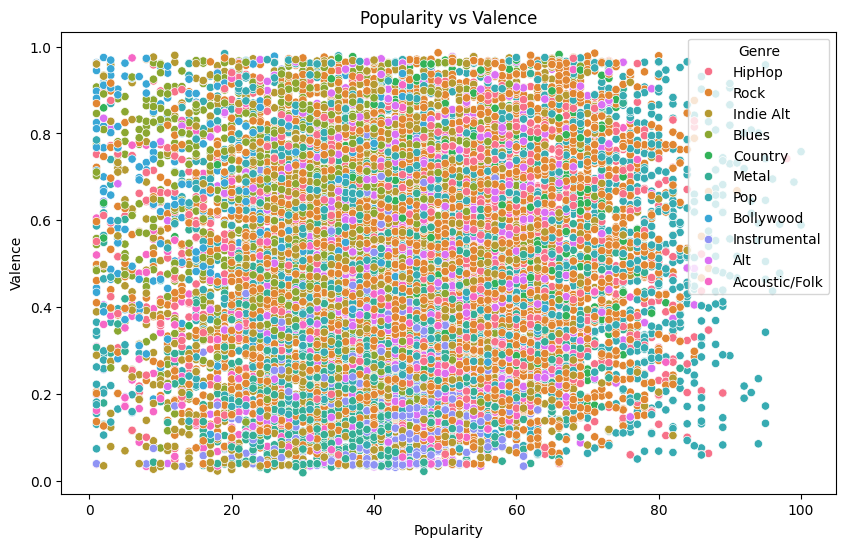

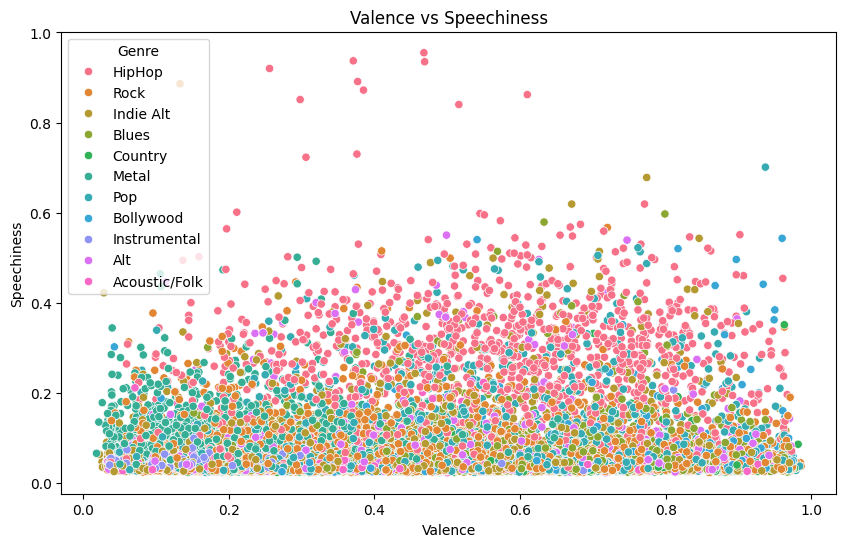

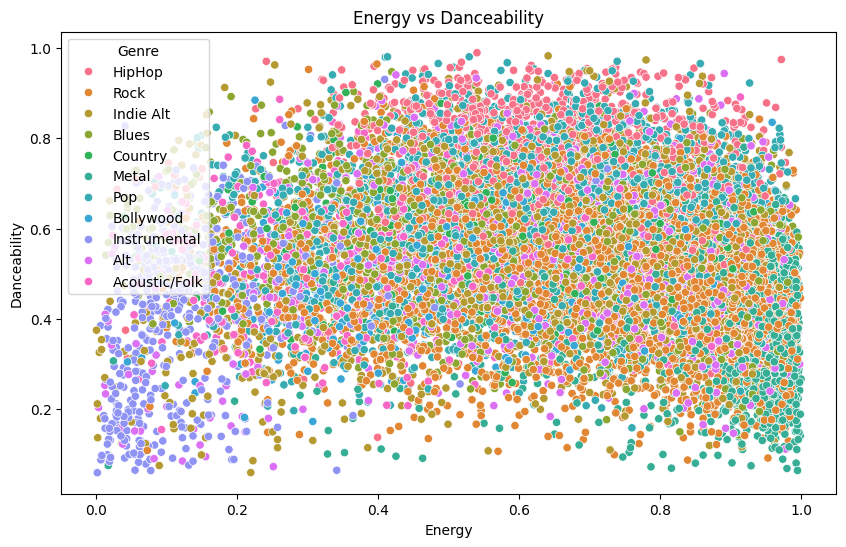

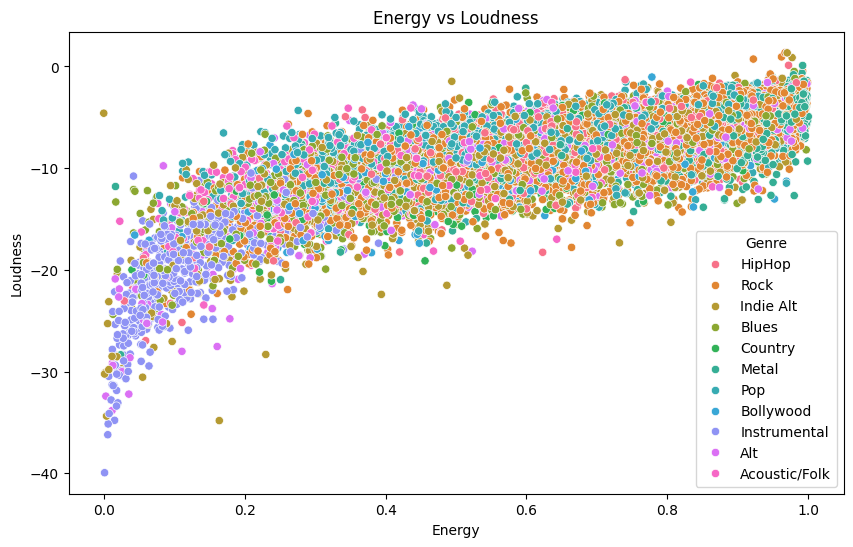

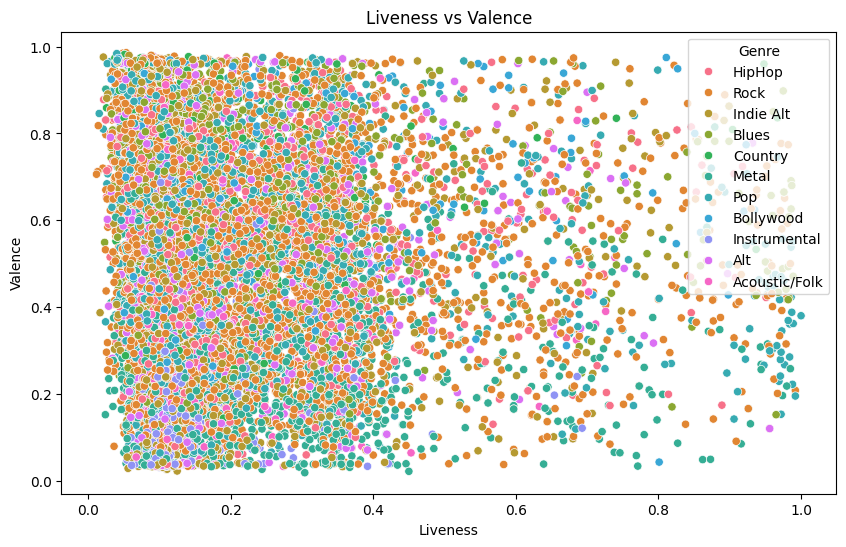

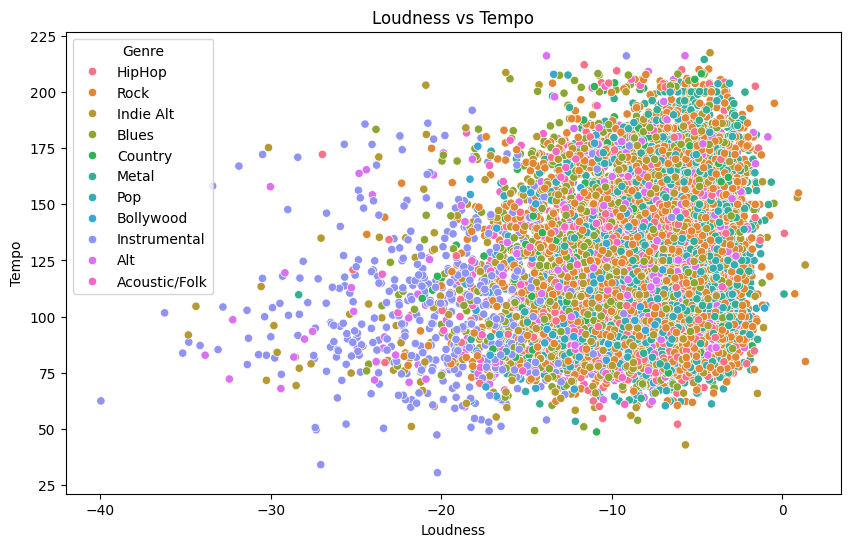

In [ ]:
# Gráfico de dispersión de Popularity vs Valence
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='valence', hue='Genre', data=train_df)
plt.xlabel('Popularity')
plt.ylabel('Valence')
plt.title('Popularity vs Valence')
plt.show()

# Gráfico de dispersión de Valence vs Speechiness
plt.figure(figsize=(10,6))
sns.scatterplot(x='valence', y='speechiness', hue='Genre', data=train_df)
plt.xlabel('Valence')
plt.ylabel('Speechiness')
plt.title('Valence vs Speechiness')
plt.show()

# Gráfico de dispersión de Energy vs Danceability
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='danceability', hue='Genre', data=train_df)
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs Danceability')
plt.show()

# Gráfico de dispersión de Energy vs Loudness
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='loudness', hue='Genre', data=train_df)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')
plt.show()


# Gráfico de dispersión de Loudness vs Tempo
plt.figure(figsize=(10,6))
sns.scatterplot(x='loudness', y='tempo', hue='Genre', data=train_df)
plt.xlabel('Loudness')
plt.ylabel('Tempo')
plt.title('Loudness vs Tempo')
plt.show()

### Análisis Multivariado

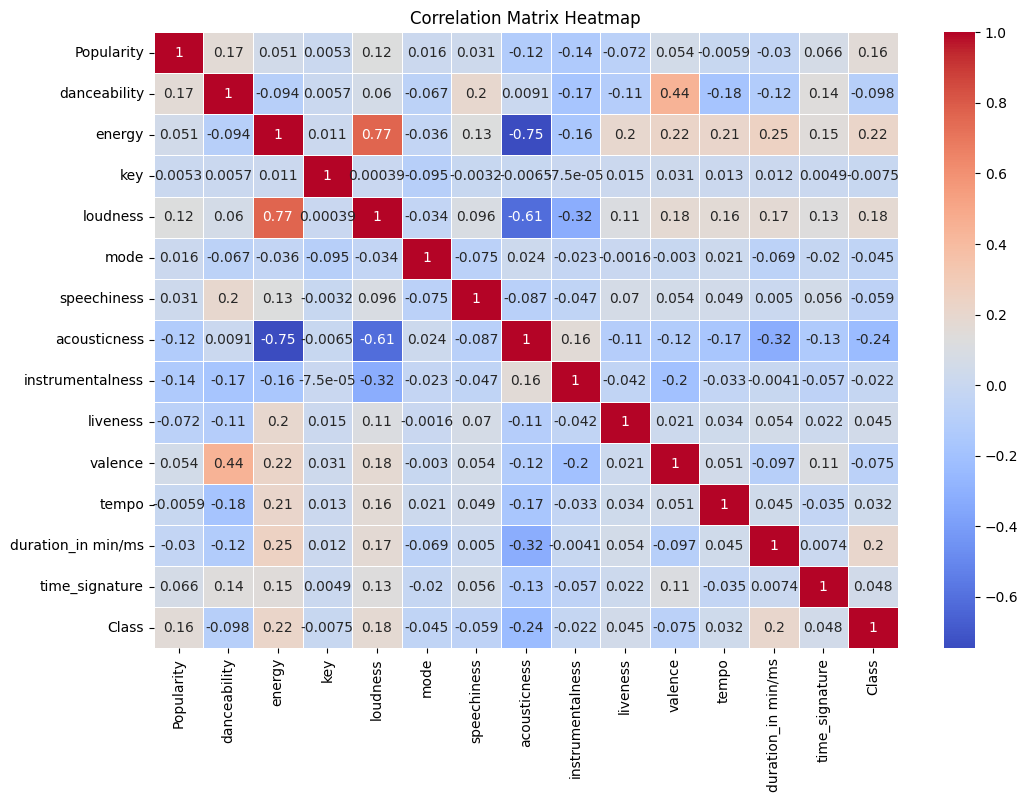

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Crear una matriz de correlación
correlation_matrix = train_df[numeric_cols].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##**5. PREPROCESAMIENTO DE DATOS**

In [ ]:
##Se muestran columnas con valores únicos para identificación de columnas irrelevantes

print(train_df.nunique())

Artist Name            9149
Track Name            15129
Popularity              100
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       4254
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
Genre                    11
dtype: int64


### Encoding & Normalizado

In [ ]:
# Eliminar columnas irrelevantes
irrelevant_columns = ['Track Name']
train_df.drop(columns=irrelevant_columns, inplace=True)

# Encoding de la columna categórica
label_encoder = LabelEncoder()
train_df['Artist Name'] = label_encoder.fit_transform(train_df['Artist Name'])



In [ ]:
semilla = 777

In [ ]:
# Normalizar las características numéricas
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])

# División del conjunto de datos en entrenamiento y prueba
X = train_df.drop(columns=['Genre'])
y = train_df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

print("Conjunto de entrenamiento:")
print(X_train.head())
print(y_train.head())

print("Conjunto de prueba:")
print(X_test.head())
print(y_test.head())

Conjunto de entrenamiento:
       Artist Name  Popularity  danceability    energy       key  loudness  \
3325     -0.690127   -0.261349     -0.044707  0.566024 -1.012891 -0.365850   
11916     1.090233    0.958295      0.219932 -0.729826  0.306973  0.357779   
3        -0.978304    1.248687      1.861901 -0.279465  1.296871  0.341479   
13348     1.005742    0.435590     -0.688263  1.411513 -1.672823  0.878643   
7870      0.602143   -0.551741      1.001822 -0.763815 -0.352959 -0.462416   

           mode  speechiness  acousticness  instrumentalness  liveness  \
3325  -1.323988    -0.546906     -0.785876     -2.176326e-01 -0.881052   
11916  0.755294    -0.653399      1.055677     -1.049395e-16 -0.472151   
3     -1.323988    -0.289648     -0.727188     -1.049395e-16 -0.465870   
13348 -1.323988     0.709469     -0.785747     -6.709760e-01  0.784073   
7870  -1.323988     0.565884      0.936562     -1.049395e-16 -0.709578   

        valence     tempo  duration_in min/ms  time_signatu

##**6.  SELECION DE MODELOS Y ENTRENAMIENTO**

In [ ]:
# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (12597, 16)
Tamaño de X_test: (5399, 16)
Tamaño de y_train: (12597,)
Tamaño de y_test: (5399,)


In [ ]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

 # Obtener probabilidades en lugar de predicciones de clase
    y_probs = modelo.predict_proba(X_test)  # Reemplazar 'model' con el modelo actual

# Convertir y_test e y_pred a numéricas usando LabelEncoder
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)

 # Calcular ROC AUC con las probabilidades
    rocauc = roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')

# Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


# Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

# Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

In [ ]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

In [ ]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

#### Árbol de decisión

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state = semilla)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-159-14c8574b157d>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Árbol de Decisión
              Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Árbol de Decisión  0.886646   0.807826  0.886646  0.975232  0.840298   

     Tiempo  
0  0.098405   



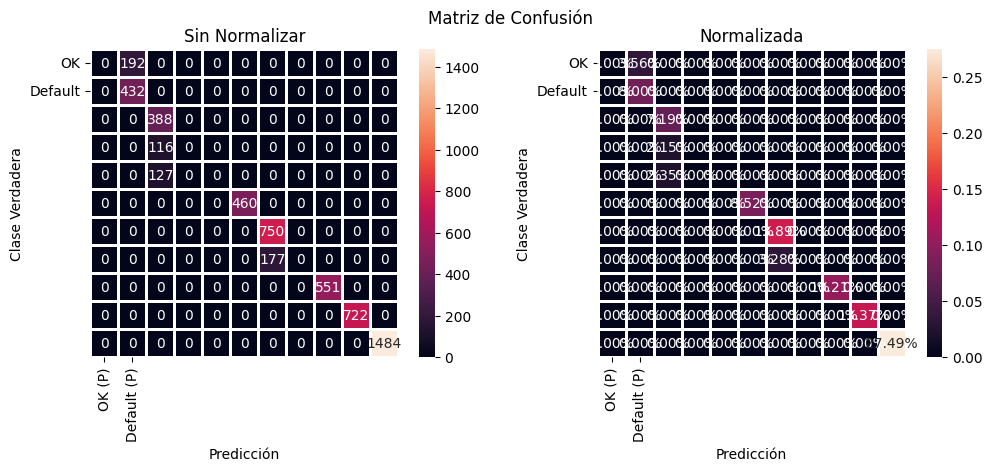

In [ ]:
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

In [ ]:
# Modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Entrenamiento de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Decision Tree model trained.
Logistic Regression model trained.
Random Forest model trained.
K-Nearest Neighbors model trained.


#### Random Forest

In [ ]:
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=semilla,
    class_weight='balanced'  # Si hay desnsalance de clases
)

Resultados para el modelo: Random Forest
          Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score    Tiempo
0  Random Forest  0.939248   0.946475  0.939248  0.997561  0.939573  2.244337 



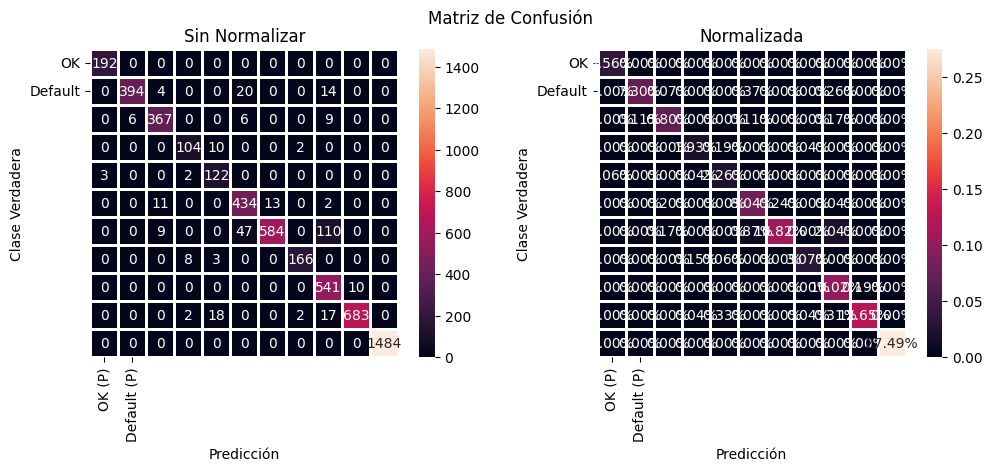

In [ ]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

##**7. Conclusión**

Árbol de Decisión y Random Forest muestran resultados sobresalientes en todas las métricas, con Árbol de Decisión siendo el modelo más rápido.
Regresión Logística tiene un rendimiento más bajo, especialmente en Recall y ROCAUC, lo que podría hacerla menos adecuada en este contexto.
Si el tiempo de ejecución es crítico, el Árbol de Decisión sería la mejor opción, mientras que si se requiere un balance de precisión y recall sin importar tanto el tiempo, Árbol de Decisión o Random Forest son opciones ideales.